# ShowerPy Demo 
This notebook illustrates some of the functionality of the ShowerPy package 

# 1. Simulating showers

To simulate showers, we can use the `CorsikaRunner` class 

In [ ]:
from astropy import units as u
from CorsikaRunner import CorsikaRunner
import os

# This is the path to your compiled CORSIKA binary 
path_corsika_executable = '/home/jschaefer/Software/corsika-78000/run/corsika78000Linux_QGSIII_urqmd'

# We now open the runner
CR = CorsikaRunner(
    path_corsika_executable = path_corsika_executable
)

# And configure a run, we want to simulate 
CR.configure_run(
    primary_particle = 'gamma', 
    primary_energy = 50 * u.GeV,
    observation_level= 0 * u.km,
    zenith_angle = 0 * u.deg,
    azimuth_angle = 0 * u.deg,
    random_seeds = True,
    ext_atmosphere= None, # External atmospheric profile (proprietary)
    path_output = os.path.join(os.getcwd(), '50GeV_gamma_0deg_zenith')
)

# Let us have a look at the current config 
CR.current_config


{'run_number': 1,
 'primary_particle': 1,
 'primary_energy': <Quantity 50. GeV>,
 'observation_level': <Quantity 0. cm>,
 'zenith_angle': <Quantity 0. deg>,
 'azimuth_angle': <Quantity 0. deg>,
 'seeds': 'SEED    508438918    983    0     seed for random number sequence 1\nSEED    690347807    787    0     seed for random number sequence 2\nSEED    349533405    935    0     seed for random number sequence 3\nSEED    11598307    393    0     seed for random number sequence 4',
 'path_output': '/home/jschaefer/Software/showerpy/showerpy/60GeV_gamma_0deg_zenith',
 'ext_atmosphere': '*'}

Now that we have the config, we can start the simulation using the `CR.run_simulation()` call. Depending on your selections this may take anywhere from 20 seconds to a few minutes. 

In [21]:
CR.run_simulation()

Starting CORSIKA simulation (this may take a few minutes)...


Outside grid limits: ix=0, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=1, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=2, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=3, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=4, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=5, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=6, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=7, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=8, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=9, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=10, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=11, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=12, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=13, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=14, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=15, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=16, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=17, iy=1100, nx=1100, ny=1100
Outside grid limits: ix=18, iy=1100, n

Simulation has completed
	-> Copying files to user directory
	-> Cleanup temporary working directory


# 2. Plotting showers

In order to plot showers, we will use the `CorsikaPlotter` Class. At first, we need to tell the plotter, where our files are located (this directory). Afterwards, `CorsikaPlotter` will parse all the data into pandas dataframes

In [1]:
from CorsikaPlotter import CorsikaPlotter

# Use this if you just simulated a shower
# path_data = CR.current_config['path_output']

# Or point directly to the simulated data
path_data = '50GeV_gamma_0deg_zenith'

CP = CorsikaPlotter(path_data)


Looking for available files:
	 -> em_data        : Found sim_DAT000001.track_em
	 -> muon_data      : Found sim_DAT000001.track_mu
	 -> hadron_data    : Found sim_DAT000001.track_hd
	 -> cherenkov_data : Found sim_cherenkov_iact

Parsing Cherenkov photon data
	-> Gamma with 50.0 GeV energy
	-> Arriving from from zenith=0.0°,azimuth=0.0°
	-> First interaction height: 13.5 km
	-> Observation level: 0.0 km

Parsing particle track data
	-> Reading sim_DAT000001.track_em
	-> Reading sim_DAT000001.track_mu
	-> Reading sim_DAT000001.track_hd

Correcting Cherenkov coordinate system
	-> Primary trajectory: Start=(   0.0,    0.0,  112.8) km
	                       End  =(   0.0,    0.0,   40.0) km
	-> Shower axis impact point: x=0.00 km, y=0.00 km
	-> Shifting Cherenkov photon coordinates


We can now look at the cherenkov and particle track data in pandas data frame format if that is required. 

In [2]:
# The Cherenkov photons are stored in the ground plane  with x/y coordinates. 
CP.cherenkov_photons

,x_impact_cm,y_impact_cm,cos_incident_x,cos_incident_y,time_since_first_interaction_ns,emission_height_asl_cm,photons,wavelength_nm
0,-13993.856445,12018.701172,-0.011207,0.009625,-3325.327393,1.348587e+06,7.586327,103.963455
1,-17756.726562,-1285.417480,-0.014220,-0.001029,-3325.638916,1.348579e+06,7.058471,110.420448
2,-2228.675049,13040.375977,-0.001785,0.010444,-3327.534912,1.348571e+06,3.907764,449.965637
3,3389.576172,-13834.501953,0.002715,-0.011080,-3327.162598,1.348563e+06,4.517308,203.270309
4,-11898.071289,14107.539062,-0.009528,0.011298,-3325.322998,1.348555e+06,7.595437,103.867462
...,...,...,...,...,...,...,...,...
3549180,86809.046875,52237.605469,0.152870,0.090617,-3016.193604,6.602833e+05,2.321853,316.088043
3549181,86882.289062,51548.570312,0.153012,0.089414,-3017.888916,6.602738e+05,2.073182,540.093262
3549182,87773.273438,43951.843750,0.154711,0.076136,-3034.294922,6.602592e+05,3.177545,190.007339
3549183,89583.320312,40333.226562,0.157887,0.069771,-3033.663574,6.602424e+05,5.661616,121.124886


In [3]:
# The particles are stored as tracks, providng x,y,z start and stop values for each tracking step. the type of particle is encoded in the particle ID. 
CP.particle_tracks

,particle_id,energy_gev,x_start,y_start,z_start,t_start,x_end,y_end,z_end,t_end
0,1.0,50.000004,0.000000,0.000000,1.128292e+07,0.000000,0.000000,0.000000,4.000000e+06,0.000243
1,1.0,50.000004,0.000000,0.000000,4.000000e+06,0.000243,0.000000,0.000000,1.348595e+06,0.000331
2,2.0,24.707005,0.000000,0.000000,1.348595e+06,0.000331,-0.018640,-0.016679,1.346366e+06,0.000331
3,2.0,24.705542,-0.018640,-0.016679,1.346366e+06,0.000331,-0.190684,0.093392,1.344146e+06,0.000332
4,2.0,24.704079,-0.190684,0.093392,1.344146e+06,0.000332,-0.213978,0.143629,1.341933e+06,0.000332
...,...,...,...,...,...,...,...,...,...,...
35767,2.0,0.021117,4011.363037,-50756.085938,7.889462e+05,0.000351,4004.805908,-50926.515625,7.887564e+05,0.000351
35768,2.0,0.020836,4004.805908,-50926.515625,7.887564e+05,0.000351,3990.754639,-51092.832031,7.885680e+05,0.000351
35769,2.0,0.020560,3990.754639,-51092.832031,7.885680e+05,0.000351,3978.639648,-51262.398438,7.883869e+05,0.000351
35770,2.0,0.020510,3978.639648,-51262.398438,7.883869e+05,0.000351,3977.170654,-51292.515625,7.883537e+05,0.000351


In [56]:
# The meaning of the particle id can be accessed from the particle map (dictionary) stored in the CorsikaRunner
CP.particle_map

{'gamma': 1,
 'electron': 2,
 'positron': 3,
 'muon': 5,
 'antimuon': 6,
 'proton': 14,
 'helium': 402,
 'lithium': 703,
 'beryllium': 904,
 'boron': 1105,
 'carbon': 1206,
 'nitrogen': 1407,
 'oxygen': 1608,
 'fluorine': 1909,
 'neon': 2010,
 'sodium': 2311,
 'magnesium': 2412,
 'aluminium': 2713,
 'silicon': 2814,
 'phosphorus': 3115,
 'sulfur': 3216,
 'chlorine': 3517,
 'argon': 3618,
 'potassium': 3919,
 'calcium': 4020,
 'scandium': 4321,
 'titanium': 4422,
 'vanadium': 4723,
 'chromium': 4824,
 'manganese': 5125,
 'iron': 5626}

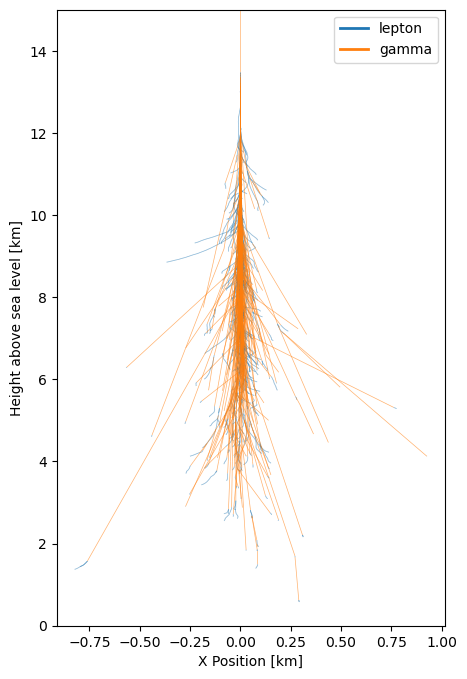

In [60]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax0 = plt.subplots(1, 1, figsize=(5, 8))

#  We can also define a color dict to specify the plot color for different particles
color_dict = {
#  "hadron":'tab:red', 
 'lepton':'tab:blue',
# 'muon + antimuon': 'tab:green',
'gamma': 'tab:orange'
}


# Now we plot the side profile
ax0 = CP.plot_side_profile(ax = ax0,
                           alpha=0.6, # Opacity of a single track
                           color_dict = color_dict,
)
plt.xlabel('X Position [km]')
plt.ylabel('Height above sea level [km]')
plt.show()
plt.close()


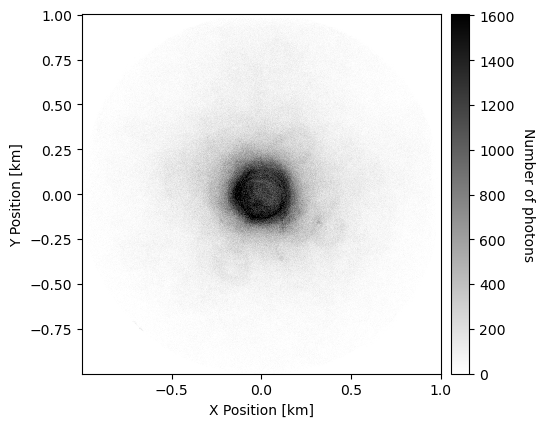

In [81]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax1 = plt.subplots(1, 1, figsize=(5, 8))

ax1 = CP.plot_mewcher_distribution(
    ax = ax1,
    # use_log=True,
    auto_center=True,
    # show_colorbar=False,
    # cmap='hsv',
    # cmap='viridis',
    # vmin = 1,
    # vmax = 1000,
    nbins = 400 
)


plt.show()
plt.close()


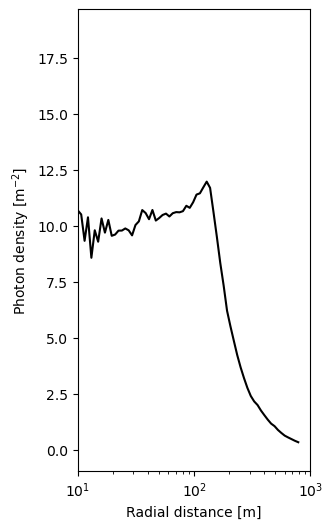

In [ ]:
# We can also plot the cherenkov photon density on ground vs. radial distance 
# Note: The current implementation is only valid for showers generated with a zenith angle of zero
import matplotlib.pyplot as plt

ax = CP.plot_ground_photon_density(
    ax = None, 
    nbins = 200
)

plt.show()

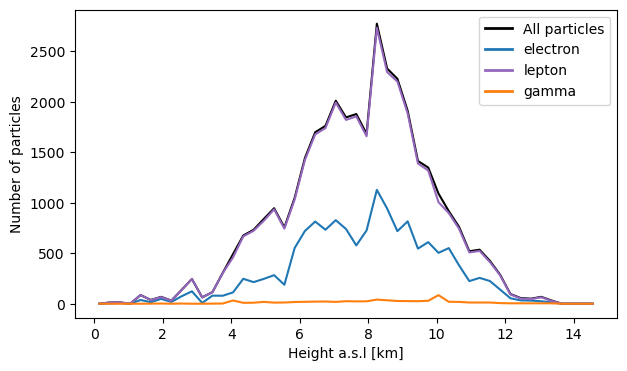

In [10]:
# Note: you can also highlight different particles with different colors 

color_dict = {
 "electron": "tab:blue",
'lepton':'tab:purple',
#  "muon + antimuon": "tab:green", # Note: the + combines all of these for the plot (multiple possible)
#  'hadron': 'tab:red',
'gamma':'tab:orange'
}

ax = CP.plot_particle_height_distribution(
    color_dict = color_dict,
    height_steps= 0.3
)
